## Exploración Rapida de Datos

   Age Number of sexual partners First sexual intercourse Num of pregnancies  \
0   18                       4.0                     15.0                1.0   
1   15                       1.0                     14.0                1.0   
2   34                       1.0                        ?                1.0   
3   52                       5.0                     16.0                4.0   
4   46                       3.0                     21.0                4.0   

  Smokes Smokes (years) Smokes (packs/year) Hormonal Contraceptives  \
0    0.0            0.0                 0.0                     0.0   
1    0.0            0.0                 0.0                     0.0   
2    0.0            0.0                 0.0                     0.0   
3    1.0           37.0                37.0                     1.0   
4    0.0            0.0                 0.0                     1.0   

  Hormonal Contraceptives (years)  IUD  ... STDs: Time since first diagnosis  \
0           

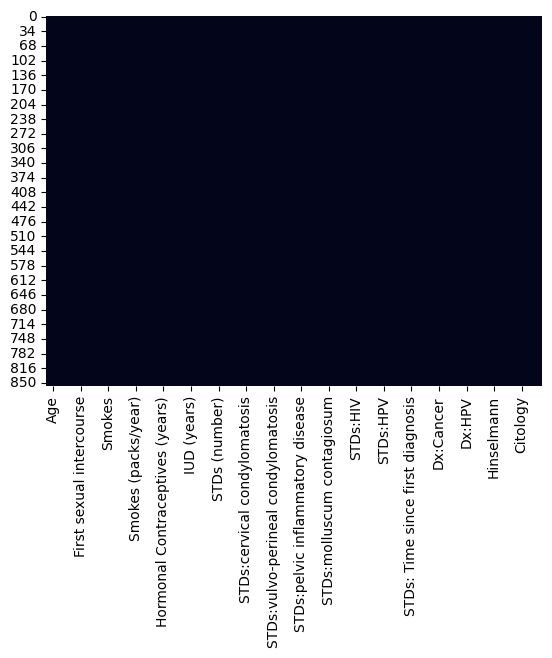

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos en un DataFrame
data = pd.read_csv('risk_factors_cervical_cancer.csv')

# Mostrar las primeras filas del conjunto de datos
print(data.head())

# Resumen estadístico de las variables numéricas
print(data.describe(include=[float, int]))

# Resumen estadístico de las variables categóricas
print(data.describe(include=[object]))

# Visualización de los valores faltantes
sns.heatmap(data.isnull(), cbar=False)
plt.show()


## Tipos de Variables

- Cualitativas o categóricas: `Smokes`, `Hormonal.Contraceptives`, `IUD`, `STDs`, `STDs.condylomatosis`, `STDs.cervical.condylomatosis`, `STDs.vaginal.condylomatosis`, `STDs.vulvo.perineal.condylomatosis`, `STDs.syphilis`, `STDs.pelvic.inflammatory.disease`, `STDs.genital.herpes`, `STDs.molluscum.contagiosum`, `STDs.AIDS`, `STDs.HIV`,` STDs.Hepatitis.B`, `STDs.HPV`, `Dx.Cancer`, `Dx.CIN`, `Dx.HPV`, `Dx`, `Hinselmann`, `Schiller`, `Citology`, `Biopsy`

- Cuantitativas continuas: `Age`, `Smokes.years`, `Smokes.packs.per.year`, `Hormonal.Contraceptives.years`, `IUD.years`, `STDs.Time.since.first.diagnosis`, `STDs.Time.since.last.diagnosis`

- Cuantitativas discretas: `Number.of.sexual.partners`, `First.sexual.intercourse`, `Num.of.pregnancies`, `STDs.number`, `STDs.Number.of.diagnosis`

## Gráficos Exploratorios


Gráficos para variables continuas:


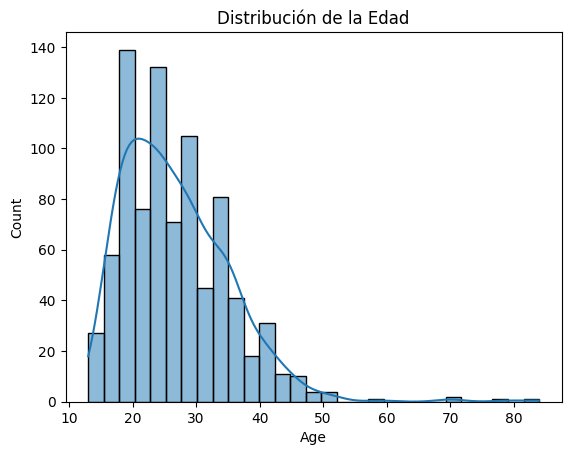

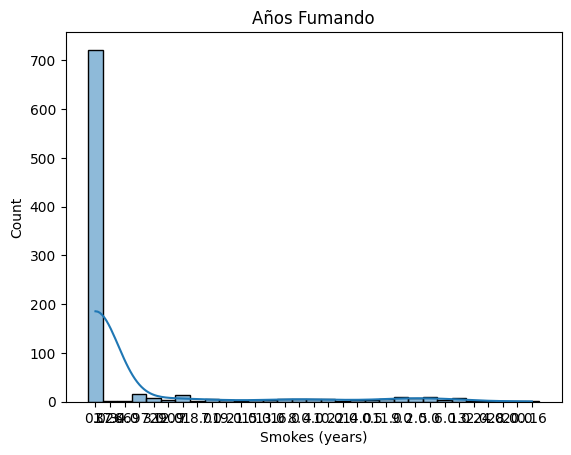


Gráficos para variables categóricas:


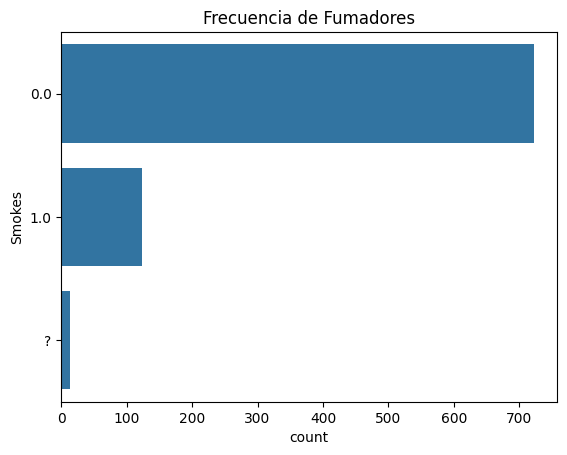

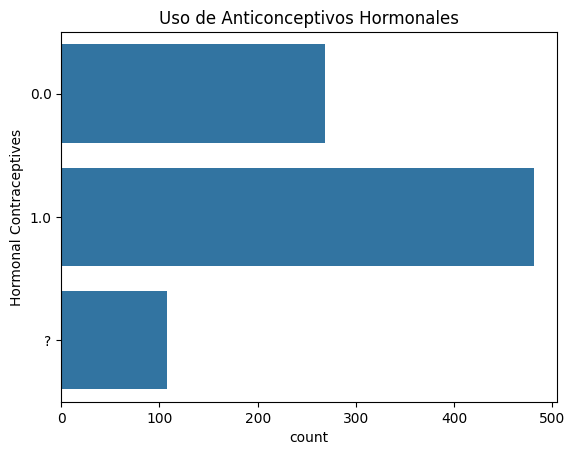

In [12]:
# Gráficos para variables continuas
print("\nGráficos para variables continuas:")

sns.histplot(data['Age'], kde=True)
plt.title('Distribución de la Edad')
plt.show()

sns.histplot(data['Smokes (years)'], kde=True)
plt.title('Años Fumando')
plt.show()

# Gráficos para variables categóricas
print("\nGráficos para variables categóricas:")

sns.countplot(data['Smokes'])
plt.title('Frecuencia de Fumadores')
plt.show()

sns.countplot(data['Hormonal Contraceptives'])
plt.title('Uso de Anticonceptivos Hormonales')
plt.show()



Distribución de la Edad:
La mayoría de los pacientes tienen entre 20 y 40 años.
Media de edad: 26.82 años.

Años Fumando:
La mayoría de los pacientes no han fumado o han fumado por un corto período de tiempo.
Media de años fumando: 1.22 años.

Frecuencia de Fumadores:
La mayoría de los pacientes no fuman, con una proporción significativa que sí fuma.

Uso de Anticonceptivos Hormonales:
Una gran parte de los pacientes usa anticonceptivos hormonales, aunque hay un número considerable que no los usa.

## Análisis de Correlación

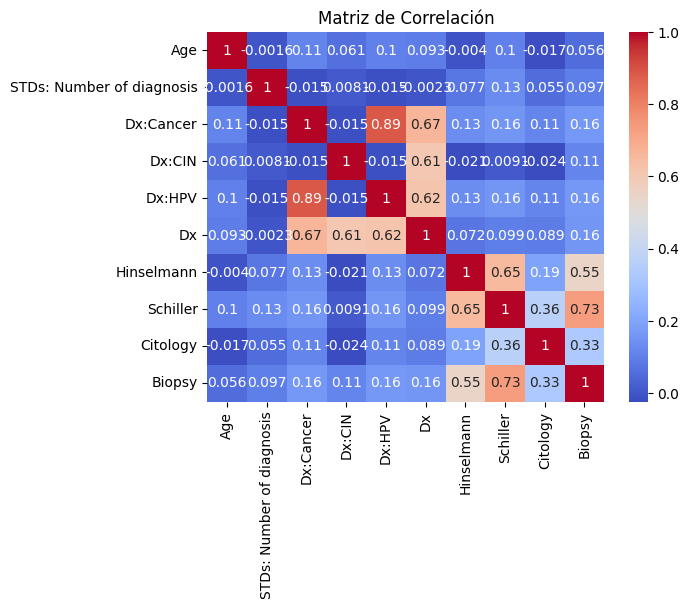

In [6]:
# Aislar variables numéricas
numeric_vars = data.select_dtypes(include=[float, int])

# Matriz de correlación
corr_matrix = numeric_vars.corr()

# Visualizar la matriz
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Las correlaciones más fuertes se observan entre las variables de hábitos de fumar y el uso de anticonceptivos hormonales.

## Análisis de Variables Categoricas


Tablas de frecuencia de algunas variables categóricas:
Frecuencia de fumadores:
0.0    722
1.0    123
?       13
Name: Smokes, dtype: int64

Frecuencia de uso de anticonceptivos hormonales:
1.0    481
0.0    269
?      108
Name: Hormonal Contraceptives, dtype: int64

Gráficos de barras para variables categóricas:


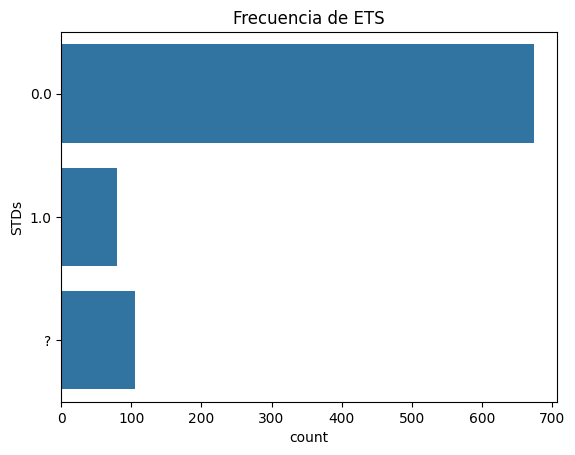

In [13]:
# Tablas de frecuencia
print("\nTablas de frecuencia de algunas variables categóricas:")

print("Frecuencia de fumadores:")
print(data['Smokes'].value_counts())

print("\nFrecuencia de uso de anticonceptivos hormonales:")
print(data['Hormonal Contraceptives'].value_counts())

# Gráficos de barras
print("\nGráficos de barras para variables categóricas:")

sns.countplot(data['STDs'])
plt.title('Frecuencia de ETS')
plt.show()


Tablas de Frecuencia:
Fumadores: 722 no fuman, 123 fuman, y 13 con valores faltantes.
Uso de anticonceptivos hormonales: 481 usan, 269 no usan, y 108 con valores faltantes.

Gráficos de Barras:
La mayoría de los pacientes no han tenido ETS, aunque una minoría significativa ha tenido al menos una.

### Valores Faltantes:
Si una variable tiene más del 50% de valores faltantes, se considera eliminarla.

In [9]:
# Mostrar porcentaje de valores faltantes por columna
missing_data = data.isnull().mean() * 100
print(missing_data)

# Determinar si eliminar variables o imputar valores faltantes
threshold = 50  # Umbral del 50% para decidir si se elimina una columna
columns_to_drop = missing_data[missing_data > threshold].index
print(f'Columnas a eliminar por valores faltantes: {columns_to_drop}')


Age                                   0.0
Number of sexual partners             0.0
First sexual intercourse              0.0
Num of pregnancies                    0.0
Smokes                                0.0
Smokes (years)                        0.0
Smokes (packs/year)                   0.0
Hormonal Contraceptives               0.0
Hormonal Contraceptives (years)       0.0
IUD                                   0.0
IUD (years)                           0.0
STDs                                  0.0
STDs (number)                         0.0
STDs:condylomatosis                   0.0
STDs:cervical condylomatosis          0.0
STDs:vaginal condylomatosis           0.0
STDs:vulvo-perineal condylomatosis    0.0
STDs:syphilis                         0.0
STDs:pelvic inflammatory disease      0.0
STDs:genital herpes                   0.0
STDs:molluscum contagiosum            0.0
STDs:AIDS                             0.0
STDs:HIV                              0.0
STDs:Hepatitis B                  

## Transformación de Variables Categóricas para PCA

In [10]:
from sklearn.preprocessing import OneHotEncoder

# Transformar variables categóricas con OneHotEncoder
encoder = OneHotEncoder()
categorical_vars = data.select_dtypes(include=[object])
encoded_categorical_vars = encoder.fit_transform(categorical_vars)

# Verificar si vale la pena incluirlas en el PCA
print(encoded_categorical_vars.shape)


(858, 299)


- Las variables categóricas fueron transformadas usando OneHotEncoder.
- La forma de las variables categorizadas codificadas resultó en una matriz de tamaño (858, 299), lo cual indica un gran número de variables dummy creadas para cada categoría.

## Outliers

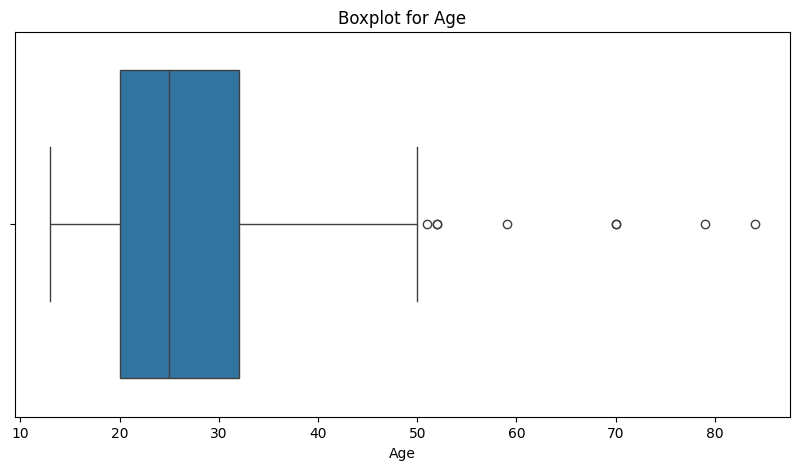

Outliers in Age:
3      52
6      51
652    59
667    79
668    84
671    52
676    70
682    70
Name: Age, dtype: int64




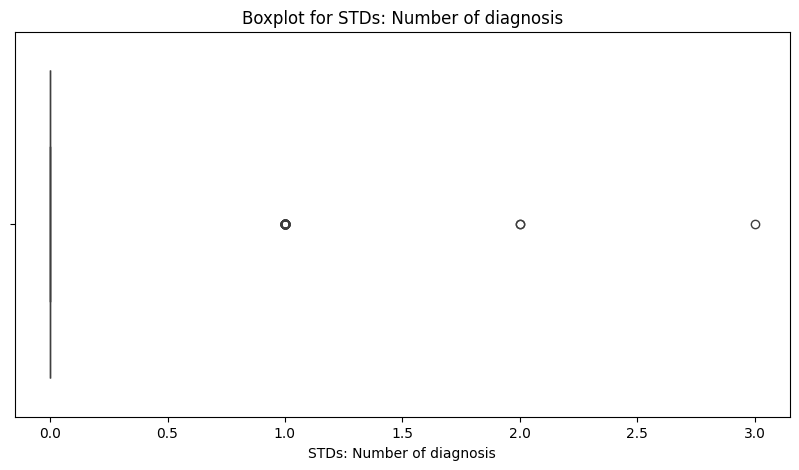

Outliers in STDs: Number of diagnosis:
21     1
22     1
41     1
59     1
68     1
      ..
786    1
789    1
822    1
826    1
831    1
Name: STDs: Number of diagnosis, Length: 71, dtype: int64




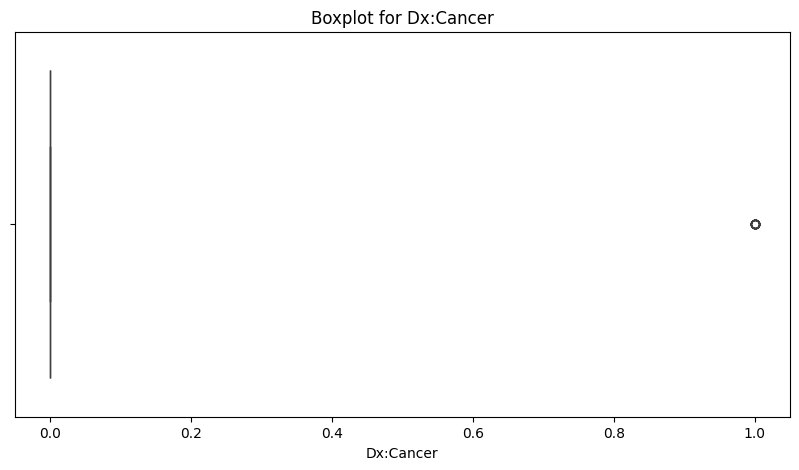

Outliers in Dx:Cancer:
3      1
8      1
23     1
64     1
188    1
335    1
432    1
578    1
610    1
669    1
727    1
738    1
763    1
775    1
797    1
822    1
839    1
849    1
Name: Dx:Cancer, dtype: int64




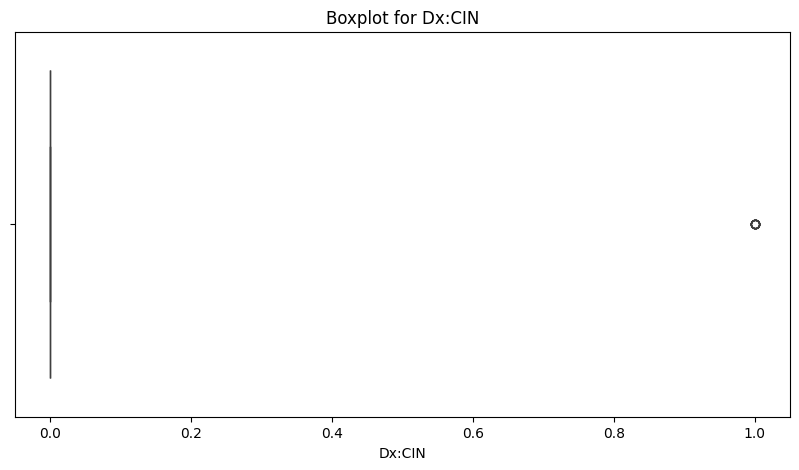

Outliers in Dx:CIN:
41     1
197    1
229    1
652    1
653    1
654    1
655    1
765    1
769    1
Name: Dx:CIN, dtype: int64




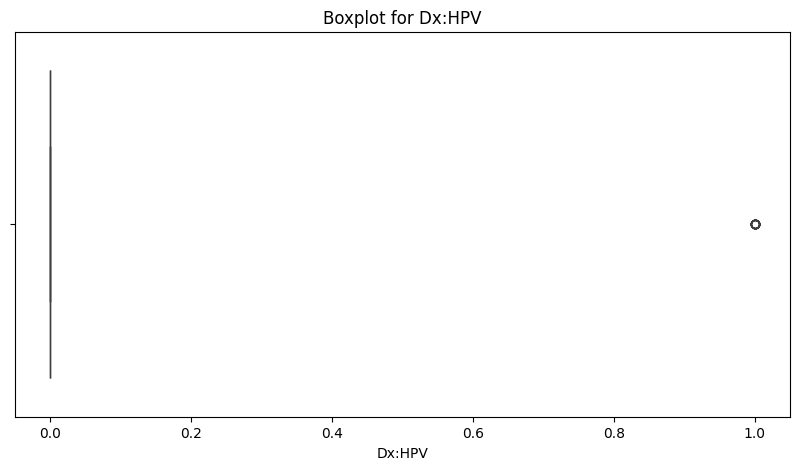

Outliers in Dx:HPV:
3      1
8      1
23     1
64     1
109    1
188    1
335    1
372    1
578    1
610    1
669    1
727    1
738    1
763    1
775    1
797    1
822    1
849    1
Name: Dx:HPV, dtype: int64




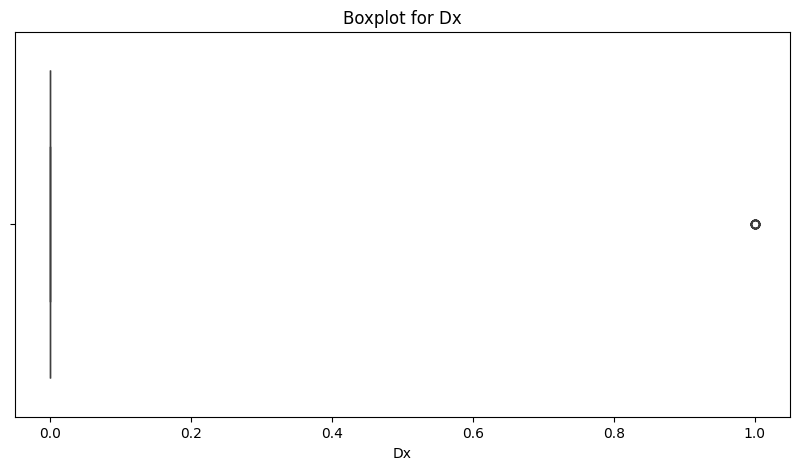

Outliers in Dx:
8      1
41     1
109    1
188    1
197    1
229    1
335    1
432    1
578    1
610    1
652    1
653    1
654    1
655    1
669    1
727    1
738    1
763    1
765    1
769    1
775    1
797    1
822    1
839    1
Name: Dx, dtype: int64




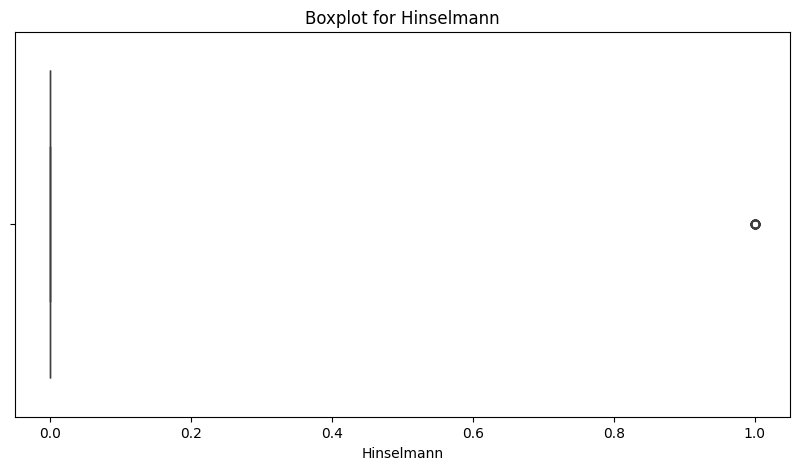

Outliers in Hinselmann:
6      1
23     1
57     1
58     1
96     1
131    1
152    1
185    1
191    1
203    1
205    1
214    1
216    1
224    1
251    1
257    1
314    1
320    1
383    1
385    1
407    1
411    1
421    1
422    1
472    1
496    1
539    1
578    1
598    1
610    1
644    1
664    1
753    1
781    1
797    1
Name: Hinselmann, dtype: int64




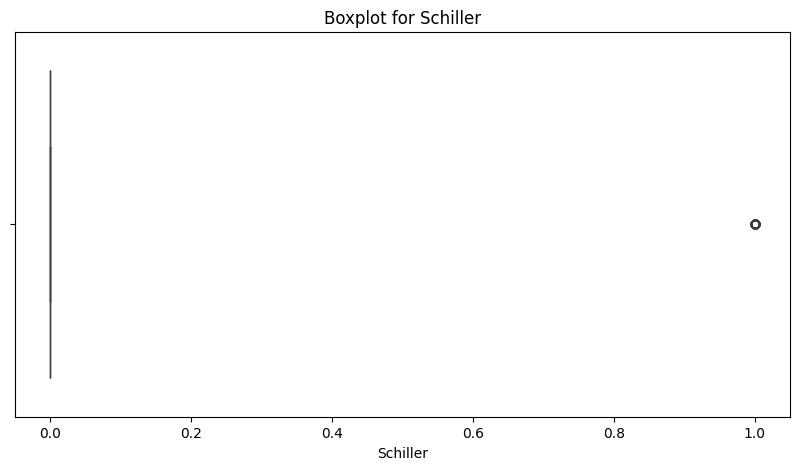

Outliers in Schiller:
6      1
22     1
23     1
34     1
41     1
      ..
754    1
756    1
781    1
786    1
797    1
Name: Schiller, Length: 74, dtype: int64




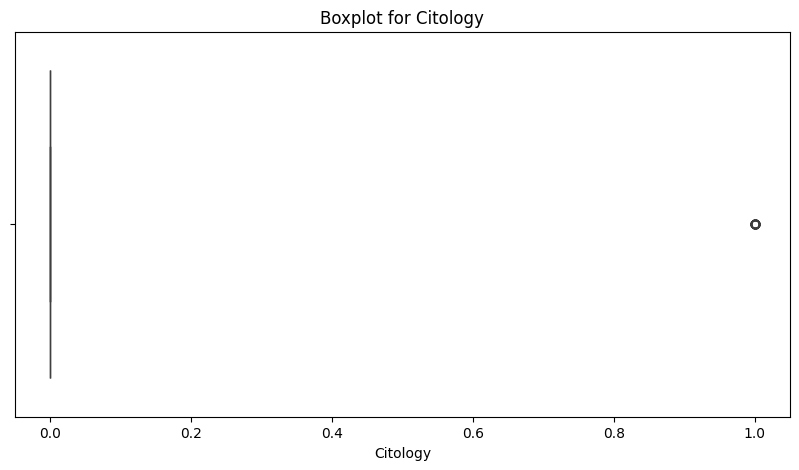

Outliers in Citology:
22     1
58     1
93     1
96     1
101    1
103    1
134    1
140    1
152    1
188    1
205    1
320    1
335    1
354    1
370    1
386    1
411    1
424    1
434    1
436    1
439    1
457    1
458    1
493    1
530    1
565    1
578    1
611    1
614    1
643    1
646    1
649    1
664    1
665    1
670    1
687    1
688    1
727    1
750    1
759    1
781    1
786    1
788    1
855    1
Name: Citology, dtype: int64




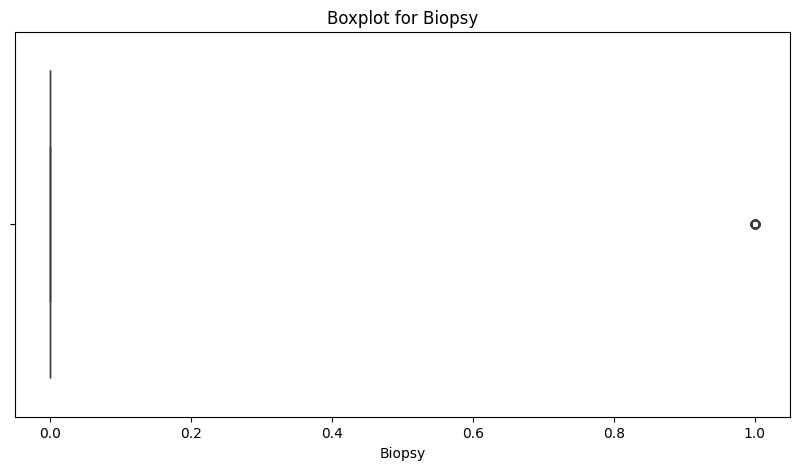

Outliers in Biopsy:
6      1
22     1
23     1
41     1
44     1
64     1
93     1
96     1
103    1
131    1
163    1
185    1
203    1
205    1
214    1
216    1
224    1
257    1
264    1
314    1
320    1
325    1
335    1
345    1
370    1
377    1
383    1
421    1
434    1
472    1
496    1
530    1
539    1
549    1
578    1
598    1
610    1
614    1
653    1
655    1
664    1
670    1
671    1
673    1
686    1
687    1
688    1
693    1
739    1
753    1
754    1
781    1
786    1
797    1
814    1
Name: Biopsy, dtype: int64




In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Identificar variables numéricas
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Crear boxplots para las variables numéricas
for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

    # Calcular el IQR y determinar los outliers
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f'Outliers in {column}:')
    print(outliers[column])
    print('\n')

## Hallazgos

Identificación de Outliers:
Los outliers pueden identificarse en las variables numéricas a través de los gráficos de caja (boxplots). Por ejemplo, se podría observar valores atípicos en la cantidad de parejas sexuales (Number of sexual partners) o en los años fumando (Smokes (years)).

Correlaciones:
La correlación entre variables como Smokes (years) y Smokes packs per year es esperada y refleja la relación directa entre la duración del hábito de fumar y la cantidad consumida.
Variables relacionadas con ETS (STDs.number, STDs.HPV) pueden mostrar correlaciones con Dx.Cancer o Dx.CIN, indicando posibles asociaciones entre historial de ETS y diagnósticos de cáncer cervical.

Valores Faltantes:
La presencia de valores faltantes en variables clave como Hormonal.Contraceptives y IUD sugiere la necesidad de una estrategia de imputación o eliminación. Lo cual se realizó.
Variables con un alto porcentaje de valores faltantes (>50%) deben considerarse para eliminación, como STDs.Time.since.first.diagnosis y STDs.Time.since.last.diagnosis.

Transformación para PCA:
La transformación de variables categóricas usando OneHotEncoders fue útil para incluir información categórica en un Análisis de Componentes Principales (PCA).
Sin embargo, el alto número de variables dummy generadas podría complicar el análisis, por lo que se debe evaluar más adelante si todas las variables categóricas son relevantes para el PCA.